In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 7장. 통계학과 머신러닝

## 파이썬을 이용한 리지 회귀와 라소 회귀

### 분석 준비

In [ ]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델을 추정하는 데 사용하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 머신러닝을 적용하기 위한 라이브러리
from sklearn import linear_model

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

In [ ]:
# 데이터 불러오기 (150,100)
X = pd.read_csv("/content/drive/MyDrive/StatsCraftLab/practice/data/7-3-1-large-data.csv")
X.head(3)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,...,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100
0,1.0000,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,...,0.0110,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100
1,0.5000,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,...,0.0109,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099
2,0.3333,0.2500,0.2000,0.1667,0.1429,0.1250,0.1111,0.1000,0.0909,0.0833,...,0.0108,0.0106,0.0105,0.0104,0.0103,0.0102,0.0101,0.0100,0.0099,0.0098


### 표준화

In [ ]:
# X_1 열의 평균
sp.mean(X.X_1)

<ipython-input-4-a856ef45c370>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(X.X_1)


0.037272

In [ ]:
# 각 열의 평균 (axis = 0)
sp.mean(X, axis = 0).head(3)

<ipython-input-5-3416f0a86486>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(X, axis = 0).head(3)


X_1    0.037272
X_2    0.030649
X_3    0.027360
dtype: float64

In [ ]:
# 표준화
X -= sp.mean(X, axis = 0)
X /= sp.std(X, ddof = 1, axis = 0)

<ipython-input-6-6636338dd33a>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  X -= sp.mean(X, axis = 0)
<ipython-input-6-6636338dd33a>:3: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  X /= sp.std(X, ddof = 1, axis = 0)


In [ ]:
# 확인 (평균 0)
sp.mean(X, axis = 0).head(3).round(3)

<ipython-input-7-7f8597f010f9>:2: DeprecationWarning: scipy.mean is deprecated and will be removed in SciPy 2.0.0, use numpy.mean instead
  sp.mean(X, axis = 0).head(3).round(3)


X_1   -0.0
X_2   -0.0
X_3    0.0
dtype: float64

In [ ]:
# 확인 (표준편차 1)
sp.std(X, ddof = 1, axis = 0).head(3)

<ipython-input-8-a6a41c84031a>:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(X, ddof = 1, axis = 0).head(3)


X_1    1.0
X_2    1.0
X_3    1.0
dtype: float64

### 시뮬레이션으로 종속변수 만들기

In [ ]:
# 종속변수(반응변수) 만들기

# 정규분포를 따르는 노이즈 생성
np.random.seed(1)
noise =  sp.stats.norm.rvs(loc = 0, scale = 1, size = X.shape[0])

# 독립변수 X_1 의 계수가 5인 종속변수 작성
y =  X.X_1 * 5 + noise

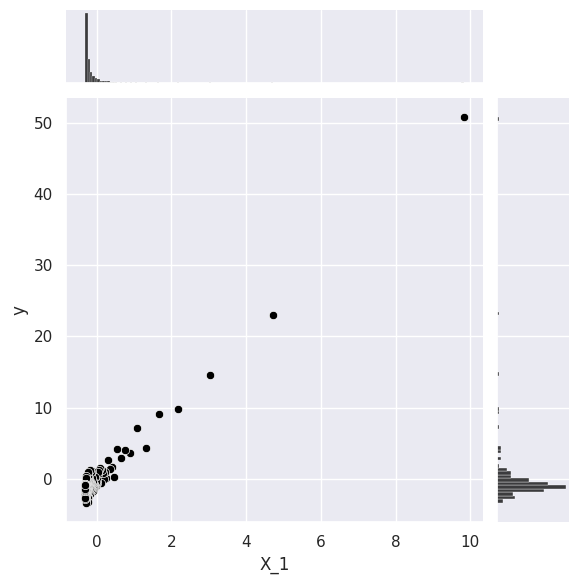

In [ ]:
# 종속변수와 독립변수 합치기 (pd.concat)
large_data = pd.concat([pd.DataFrame({"y":y}), X], axis = 1)
# 그래프 그리기
sns.jointplot(y = "y", x = "X_1", data = large_data,
              color = 'black')

### 일반적인 최소제곱법 적용하기
- 일반적인 최소제곱법을 이용해서 파라미터를 추정해본다.
- 독립변수가 많아서 formula를 작성하는 것이 번거로우므로 다음과 같이 독립변수와 종속변수를 지정해서 모델링한다.

In [ ]:
# endog: 종속변수
# exog: 독립변수
lm_statsmodels = sm.OLS(endog = y, exog = X).fit()
lm_statsmodels.params.head(3)

X_1     14.755018
X_2    -87.462851
X_3    211.743136
dtype: float64

### sklearn을 이용한 선형회귀

In [ ]:
# 어떤 모델을 만들지 지정(선형회귀)
lm_sklearn = linear_model.LinearRegression()
# 데이터를 지정하여 모델을 추정(학습)
lm_sklearn.fit(X, y)
# 추정된 파라미터 (array)
# coef 는 회귀 계수를 뜻 한다.
lm_sklearn.coef_

array([ 1.476e+01, -8.746e+01,  2.117e+02, -9.415e+01, -6.817e+01,
       -9.284e+01,  1.761e+00,  8.170e+01,  6.680e+01,  2.788e+01,
       -3.288e+01,  6.818e+01, -1.699e+01,  2.208e+01, -4.855e+01,
       -3.390e+01, -4.536e+01,  9.728e+00,  2.481e+01,  1.858e+00,
        1.599e+00, -2.838e+01,  6.477e+00, -5.980e+01,  3.532e+01,
       -1.302e+01,  4.108e+01, -4.303e+01,  5.247e+01,  1.920e+00,
        3.342e+01,  8.490e+00,  8.329e+00, -2.293e+01, -3.577e+01,
       -1.337e+01,  3.178e+01, -2.018e+01, -2.654e+01, -3.523e+01,
        1.927e+01,  4.823e+01, -1.655e+00,  5.749e-01, -1.893e+01,
        7.370e-01,  1.047e+01, -7.732e+00, -1.854e+00, -2.559e-01,
       -5.045e+00, -4.227e+00,  2.523e+01,  1.616e+01, -1.310e+01,
        6.455e+00, -1.332e+01, -2.291e+01, -1.202e+01,  7.745e+00,
        1.755e+01,  5.997e+00,  4.648e+00,  4.120e+00, -1.825e+00,
        5.366e+00,  4.546e+00, -2.598e+00, -4.091e+00,  7.496e+00,
        3.100e+01,  1.530e+01, -5.323e+00, -1.509e+01, -3.801e

### 리지회귀 - 벌칙항의 영향
- 위 scikit-learn 의 선형회귀모델(Linear Regression) 으로 모델의 회귀 계수를 추정한 결과 계수의 절댓값이 크게 추정되는 것을 확인 할 수 있다.
- 정규화 방법중 '리지 회귀(L2)' 를 이용하여 회귀계수를 추정해본다.

In [ ]:
# α 50개 생성
# np.logspace : 밑이 10인 로그
n_alphas = 50
ridge_alphas = np.logspace(-2, 0.7, n_alphas)

In [ ]:
# 위 로그값의  원 값 확인
sp.log10(ridge_alphas)

<ipython-input-14-212ae0299445>:2: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  sp.log10(ridge_alphas)


array([-2.   , -1.945, -1.89 , -1.835, -1.78 , -1.724, -1.669, -1.614,
       -1.559, -1.504, -1.449, -1.394, -1.339, -1.284, -1.229, -1.173,
       -1.118, -1.063, -1.008, -0.953, -0.898, -0.843, -0.788, -0.733,
       -0.678, -0.622, -0.567, -0.512, -0.457, -0.402, -0.347, -0.292,
       -0.237, -0.182, -0.127, -0.071, -0.016,  0.039,  0.094,  0.149,
        0.204,  0.259,  0.314,  0.369,  0.424,  0.48 ,  0.535,  0.59 ,
        0.645,  0.7  ])

In [ ]:
# α를 바꾸어 가며 50번 리지 회귀로 추정

# 추정한 회귀 계수를 저장할 리스트
ridge_coefs = []
# for 반복문으로 리지 회귀를 추정
# fit_intercept = False 로 절평(상수항) 적용 하지 않음
for a in ridge_alphas:
    ridge = linear_model.Ridge(alpha = a, fit_intercept = False)
    ridge.fit(X, y)
    ridge_coefs.append(ridge.coef_)

In [ ]:
# 추정된 계수를 numpy 배열로 변환
ridge_coefs = np.array(ridge_coefs)
ridge_coefs.shape

(50, 100)

- 행수는 alpha(알파) 의 개수 이다.
- 100열은 독립변수의 개수이다.

<ipython-input-17-b8f3f1be7e96>:2: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  log_alphas = -sp.log10(ridge_alphas)


(-8.000, 10.500)

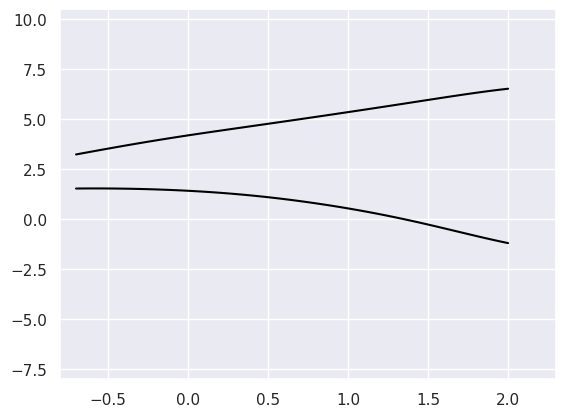

In [ ]:
# α 원 값 복원
log_alphas = -sp.log10(ridge_alphas)

# 첫 번째 열이 α가 바뀌면서 그리는 회귀 계수
plt.plot(log_alphas, ridge_coefs[::,0], color = 'black')

# 두 번째 열이 α가 바뀌면서 그리는 회귀 계수
plt.plot(log_alphas, ridge_coefs[::,1], color = 'black')

# X축의 범위
plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])

# Y축의 범위
plt.ylim([-8, 10.5])

<ipython-input-18-fcff889c3a25>:4: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  log_alphas = -sp.log10(ridge_alphas)


Text(0, 0.5, 'Coefficients')

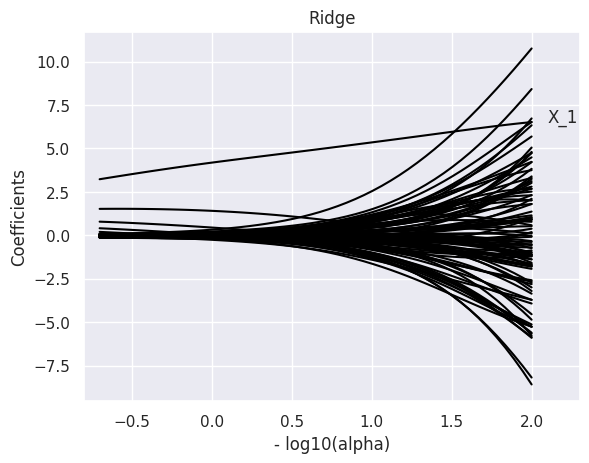

In [ ]:
# 리지 회귀를 이용한 정규화 강도와 계수의 관계

# α를 변환
log_alphas = -sp.log10(ridge_alphas)
# 가로축을 -log10(α), 세로축을 계수로 하는 그래프
plt.plot(log_alphas, ridge_coefs, color = 'black')
# 독립변수 X_1의 계수를 알기 쉽게 표시
plt.text(max(log_alphas) + 0.1, np.array(ridge_coefs)[0,0], "X_1")
# X축의 범위
plt.xlim([min(log_alphas) - 0.1, max(log_alphas) + 0.3])
# 축 레이블
plt.title("Ridge")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

### 리지 회귀 - 최적의 정규화 강도 결정
- α의 크기를 결정하는 작업 진행
- 교차검증법을 이용하여 예측 정확도를 평가해서 정확도가 가장 좋은 α를  채택하여 모델을 재구축한다.
  - RidgeCV 함수 사용

In [ ]:
# CV 에서 최적의 α를 구함
ridge_best = linear_model.RidgeCV(
    cv = 10, alphas = ridge_alphas, fit_intercept = False)
ridge_best.fit(X, y)

# 최적의 -log10(α)
-sp.log10(ridge_best.alpha_)

<ipython-input-19-8cb5a05ecfe4>:7: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  -sp.log10(ridge_best.alpha_)


0.23673469387755094

In [ ]:
# 적합한 α
ridge_best.alpha_

0.5797827717179138

In [ ]:
# 추정된 회귀 계수
ridge_best.coef_

array([ 4.463,  1.288,  0.293, -0.091, -0.201, -0.233, -0.215, -0.206,
       -0.145, -0.135, -0.155, -0.046, -0.097, -0.017, -0.11 , -0.012,
       -0.094,  0.013, -0.018, -0.031,  0.025, -0.029,  0.043, -0.087,
        0.127,  0.021,  0.055, -0.077,  0.141, -0.007,  0.099,  0.116,
       -0.044,  0.037, -0.034,  0.015,  0.123, -0.171, -0.007, -0.182,
        0.09 ,  0.222,  0.035, -0.032, -0.008,  0.025,  0.338, -0.193,
       -0.108,  0.212, -0.128, -0.246,  0.249,  0.128, -0.155,  0.27 ,
        0.03 , -0.165, -0.178,  0.158, -0.011,  0.013,  0.194,  0.134,
       -0.156, -0.018,  0.256,  0.223, -0.185,  0.006,  0.535,  0.181,
       -0.348, -0.123,  0.226, -0.043, -0.115, -0.053,  0.209,  0.189,
       -0.042, -0.205, -0.099,  0.059, -0.224,  0.15 , -0.039, -0.113,
        0.21 ,  0.012,  0.129, -0.032, -0.022, -0.229, -0.198,  0.245,
       -0.305, -0.396, -0.163,  0.164])

### 라소 회귀 - 벌칙항의 영향

In [ ]:
# α(벌칙항)을 바꿔가며 여러번 라쏘를 실행
# lasso.path 함수 이용
lasso_alphas, lasso_coefs, _ = linear_model.lasso_path(
    X, y)

<ipython-input-23-6ec212d50c4d>:4: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  log_alphas = -sp.log10(lasso_alphas)


Text(0, 0.5, 'Coefficients')

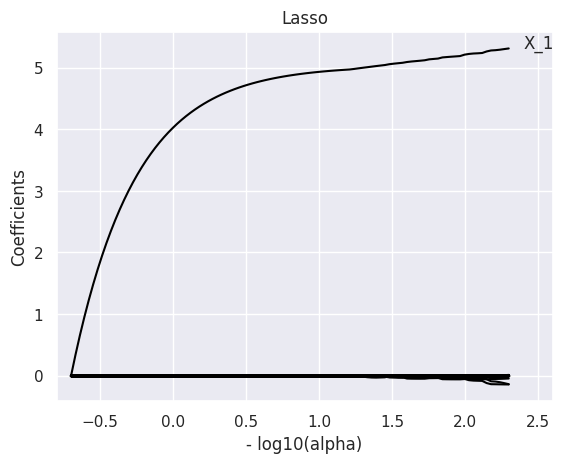

In [ ]:
# Lasso 회귀의 solution_path

# α 변환
log_alphas = -sp.log10(lasso_alphas)

# 가로축을 -log10(α), 세로축을 계수로 하는 그래프
plt.plot(log_alphas, lasso_coefs.T, color = 'black')

# 독립변수 X_1의 계수를 알기 쉽게 표시
plt.text(max(log_alphas) + 0.1, lasso_coefs[0, -1], "X_1")

# X축의 범위
plt.xlim([min(log_alphas)-0.1, max(log_alphas) + 0.3])

# 축 레이블
plt.title("Lasso")
plt.xlabel("- log10(alpha)")
plt.ylabel("Coefficients")

### 라소 회귀 - 최적의 정규화 강도 설정
- 교차검증법을 이용해서 α를 결정

In [ ]:
# CV 로 최적의 α를 결정
# cv = 10, 10-fold-cv 를 사용해서 예측 정확도를 평가
lasso_best = linear_model.LassoCV(
    cv = 10, alphas = lasso_alphas, fit_intercept = False)
lasso_best.fit(X, y)

# 최적의 -log(α)
-sp.log10(lasso_best.alpha_)

<ipython-input-24-f551faee9a1e>:8: DeprecationWarning: scipy.log10 is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log10 instead
  -sp.log10(lasso_best.alpha_)


2.3010431777673266

In [ ]:
# 최적의 α
lasso_best.alpha_

0.0049998482377299385

In [ ]:
# 최적의α에서 회귀 계수
lasso_best.coef_

array([ 5.336e+00, -0.000e+00, -0.000e+00, -3.043e-01, -4.121e-02,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00, -0.000e+00,
       -0.000e+00, -0.000e+00, -0.000e+00,  0.000e+00, -0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00, -0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
        8.425e-03,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e

- 대부분의 계수가 0이 되었다.
- X_1 의 계수가 처음 지정한 5와 유사하므로 올바르게 모델링했다고 볼 수 있다.

## 선형모델과 신경망

## 입력 벡터, 목표 벡터, 가중치, 편향
- 독립변수는 머신러닝 용어로 '입력 벡터'라고 한다.
- 종속변수는 머신러닝 용어로 '목표 벡터'라고 한다.
- 계수는 머신러닝 용어로 '가중치'라고 한다.
- 절편은 값이 항상 1인 독립변수로 볼 수 있으며, 머신러닝 용어로 '편향'이라고 한다.

### 분석준비

In [ ]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp

# 선형모델을 추정하는 라이브러리
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 다층 퍼셉트론용 애플리케이션
from sklearn.neural_network import MLPClassifier

# 샘플데이터 불러오기 (분꽃 데이터)
from sklearn.datasets import load_iris

# 테스트 데이터와 훈련 데이터 분리
from sklearn.model_selection import train_test_split

# 데이터 표준화용 라이브러리
from sklearn.preprocessing import StandardScaler

# 표시 자릿수 지정
%precision 3

'%.3f'

### 데이터 읽기와 다듬기

In [ ]:
# 데이터 로드
iris = load_iris()

In [ ]:
# 설명변수(독립변수)의 이름
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# 종속변수(설명변수, 라벨) 확인
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
# 독립변수 sepal(꽃받침)만 가져온다.
X = iris.data[50:150, 0:2]

# 분꽃의 종류도 2종류만 가져온다.
y = iris.target[50:150]

print("독립변수 shape: ", X.shape)
print("종속변수 shape: ", y.shape)

독립변수 shape:  (100, 2)
종속변수 shape:  (100,)


In [ ]:
# 데이터를 훈련 데이터와 테스트 데이터로 분리
# 모수 test_size 생략시 25% 기본값 (test_size = 0.25)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state = 2)

print("독립변수 shape: ", X_train.shape)
print("종속변수 shape: ", y_train.shape)

독립변수 shape:  (75, 2)
종속변수 shape:  (75,)


### 로지스틱 회귀
- 신경망을 구현해보기 전에 로지스틱 회귀를 이용해서 분석해본다.

In [ ]:
# 반응변수 (1 또는 2)
y_train[0:10]

array([1, 1, 2, 2, 2, 2, 1, 1, 1, 1])

In [ ]:
# 데이터 정리
# 독립변수 데이터 프레임
X_train_df = pd.DataFrame(
    X_train, columns = ["sepal_len", "sepal_wid"])
# 종속변수 데이터 프레임
y_train_df = pd.DataFrame({"species": y_train - 1})
# 데이터프레임 결합
iris_train_df = pd.concat(
    [y_train_df, X_train_df], axis=1)
# 결과 출력
print(iris_train_df.head(3))

   species  sepal_len  sepal_wid
0        0        5.7        2.8
1        0        6.6        3.0
2        1        6.1        3.0


In [ ]:
# 모델 구현
# 모든 변수('sepal_len', 'sepal_wid')를 넣은 모델
logi_mod_full = smf.glm(
    "species ~ sepal_len + sepal_wid", data = iris_train_df,
    family=sm.families.Binomial()).fit()

# 길이만('sepal_len')
logi_mod_len = smf.glm(
    "species ~ sepal_len", data = iris_train_df,
    family=sm.families.Binomial()).fit()

# 폭만('sepal_wid')
logi_mod_wid = smf.glm(
    "species ~ sepal_wid", data = iris_train_df,
    family=sm.families.Binomial()).fit()

# Null 모델 (독립변수 없음)
logi_mod_null = smf.glm(
    "species ~ 1", data = iris_train_df,
    family=sm.families.Binomial()).fit()

# AIC 비교
print("full", logi_mod_full.aic.round(3))
print("len ", logi_mod_len.aic.round(3))
print("wid ", logi_mod_wid.aic.round(3))
print("null", logi_mod_null.aic.round(3))

full 76.813
len  76.234
wid  92.768
null 105.318


-  AIC 결과로 길이 변수만('sepal_len') 이용한 모델이 폭과 길이 두 개 모두 이용한 모델보다 AIC 가 낮게 나왔다.

In [ ]:
# 推定された係数など
logi_mod_len.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-16.4152,4.000,-4.104,0.000,-24.256,-8.575
sepal_len,2.6478,0.639,4.142,0.000,1.395,3.901


- 추정된 계수를 보면 꽃받침의 길이 변수('sepal_len')은 양의 계수를 가지고 있다.
- 길이가 길수록 2번 종일 가능성이 크다. (결괏값은 '0' 과 '1'로 출력되는데, 영향을 받는다는 것은 결괏값 '1'에 영향을 준다는 의미이다.
- 또한, 결괏값 '0' 은 '1번 꽃' 을 뜻하고, 결괏값 '1'은 '2번 꽃'을 뜻 한다.

In [ ]:
# 예측 정확도
# 데이터 정리
X_test_df = pd.DataFrame(
    X_test, columns = ["sepal_len", "sepal_wid"])

# 예측
logi_fit = logi_mod_len.fittedvalues.round(0)
logi_pred = logi_mod_len.predict(X_test_df).round(0)

# 정답 수
true_train = sp.sum(logi_fit == (y_train - 1))
true_test = sp.sum(logi_pred == (y_test - 1))

# 적중률
result_train = true_train / len(y_train)
result_test = true_test / len(y_test)

# 결과 출력
print("훈련 데이터 적중률: ", result_train)
print("테스트 데이터 적중률: ", result_test)

훈련 데이터 적중률:  0.7466666666666667
테스트 데이터 적중률:  0.68


<ipython-input-37-4aba9e624d72>:11: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  true_train = sp.sum(logi_fit == (y_train - 1))
<ipython-input-37-4aba9e624d72>:12: DeprecationWarning: scipy.sum is deprecated and will be removed in SciPy 2.0.0, use numpy.sum instead
  true_test = sp.sum(logi_pred == (y_test - 1))


### 표준화
- 신경망을 이용하려면 리지 회귀와 마찬가지로 독립변수를 표준화 해야 한다.

In [ ]:
# 표준화 준비
scaler = StandardScaler()
scaler.fit(X_train)
# 표준화
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

- 표준화를 할 때 scaler.fit(X_train)의 결과와 훈련 데이터를 대상으로 fit 함수를 적용했다.
- 이렇게 함으로써 훈련 데이터 적용한 것과 똑같은 변환을 테스트 데이터에도 적용할 수 있다.

In [ ]:
# 훈련 데이터의 독립변수의 표준편차가 1인지 확인
sp.std(X_train_scaled, axis=0)

<ipython-input-39-427ea84ac503>:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(X_train_scaled, axis=0)


array([1., 1.])

In [ ]:
# 테스트 데이터 표준편차 확인 (1번 꽃, 2번 꽃)
sp.std(X_test_scaled, axis=0)

<ipython-input-40-bae4ebb59d17>:2: DeprecationWarning: scipy.std is deprecated and will be removed in SciPy 2.0.0, use numpy.std instead
  sp.std(X_test_scaled, axis=0)


array([0.74 , 0.679])

- 훈련 데이터의 표준 편차가 1로 변환되어 있다고 해서 테스트 데이터의 표준편차도 1이 된다고 <br> 할 수는 없다. "훈련 데이터와 테스트 데이터에서 똑같은 변환을 적용했다는 것" 이 중요하다. <br> 아직 테스트 데이터를 모른다는 것을 전제로 분석을 해야 하기 때문이다.

### 신경망
- 신경망을 이용하여 피팅의 정확도와 테스트 데이터에 대한 예측 정확도를 출력하는 코드

In [ ]:
# MLPClassifier 라는 함수를 사용해서 간단하게 모델을 만들 수 있다.

# hidden_layer_size = (100,100) 은 은닉층 2층으로 하여 각각의 은닉층에 100개의 유닛을 배치한다는 뜻이다.
# 입력층까지 합해서 모두 4층의 신경망이다. (입력층 1, 은닉층 2, 출력층 1)
# alpha = 0.07 로 정규화의 강도를 지정한다.
# max_iter = 10000 로 파라미터 추정을 하기 위해 최대 반복 수를 지정한다.
# radom_state = 0 으로 난수를 고정한다.
# 활성화 함수로는 'ReLU'(디폴트)가 쓰였고,
# 파라미터 추정으로는 Adam  이 디폴트로 지정되어 있다.

nnet = MLPClassifier(
    hidden_layer_sizes = (100,100),
    alpha = 0.07,
    max_iter = 10000,
    random_state = 0)
nnet.fit(X_train_scaled, y_train)

# 정답률
# nnet.score 함수를 사용하면 적중률을 간단히 계산할 수 있다.
print("훈련 데이터 적중률: ", nnet.score(X_train_scaled, y_train))
print("테스트 데이터 적중률: ", nnet.score(X_test_scaled, y_test))

훈련 데이터 적중률:  0.8933333333333333
테스트 데이터 적중률:  0.68
